# Assignment 1
## Question `1` (K-Nearest Neighbour)

| | |
|-|-|
| Course | Statistical Methods in AI |
| Release Date | `19.01.2023` |
| Due Date | `31.01.2023` |

### Instructions:
1.   Assignment must be implemented using python notebook only (Colab , VsCode , Jupyter etc.)
2.   You are allowed to use libraries for data preprocessing (numpy, pandas, nltk etc) and for algorithms as well (sklearn etc). You are not however allowed to directly use classifier models.
3.   The performance of the model will hold weightage but you will also be graded largely for data preprocessing steps , explanations , feature selection for vectors etc.
4.   Strict plagiarism checking will be done. An F will be awarded for plagiarism.

### The Dataset
The dataset is avaible in the zip file which is a collection of *11099 tweets*. The data will be in the form of a csv file. The ground truth is also given in the zip file which corresponds to whether a tweet was popular or not. Since the task involves selecting features yourself to vectorize a tweet , we suggest some data analysis of the columns you consider important.
<br><br>

### The Task
You have to build a **classifier** which can predict the popularity of the tweet, i.e , if the tweet was popular or not. You are required to use **KNN** algorithm to build the classifier and cannot use any inbuilt classifier. All columns are supposed to be analyzed , filtered and preprocessed to determine its importance as a feature in the vector for every tweet (Not every column will be useful).<br>
The Data contains the **raw text of the tweet**(in the text column) as well as other **meta data** like likes count , user followers count. Note that it might be useful to **create new columns** with useful information. For example, *number of hashtags* might be useful but is not directly present as a column.<br>
There are 3 main sub parts:
1. *Vectorize tweets using only meta data* - likes , user followers count , and other created data
2. *Vectorize tweets using only it's text*. This segment will require NLP techniques to clean the text and extract a vector using a BoW model. Here is a useful link for the same - [Tf-Idf](https://towardsdatascience.com/text-vectorization-term-frequency-inverse-document-frequency-tfidf-5a3f9604da6d). Since these vectors will be very large , we recommend reducing their dimensinality (~10 - 25). Hint: [Dimentionality Reduction](https://jonathan-hui.medium.com/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491). Please note that for this also you are allowed to use libraries.

3. *Combining the vectors from above two techinques to create one bigger vector*
<br>


Using KNN on these vectors build a classifier to predict the popularity of the tweet and report accuracies on each of the three methods as well as analysis. You can use sklearn's Nearest Neighbors and need not write KNN from scratch. (However you cannot use the classifier directly). You are expected to try the classifier for different number of neighbors and identify the optimal K value.

### Announcements

1. You are expected to only use the sklearn.neighbors.NearestNeighbors function and not the KNeighboursClassifier function.
2. You are free to choose the dimensionality The range mentioned is just a recommendation based on testing.
3. You can use sklearn or any other library to vectorize for tf-idf

### Resources

1. https://towardsdatascience.com/data-normalization-with-pandas-and-scikit-learn-7c1cc6ed6475
2. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html
3. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
4. https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a


## Import necessary libraries

In [83]:
import pandas as pd
import numpy as np
import json
from sklearn.preprocessing import normalize
from sklearn.neighbors import NearestNeighbors
import nltk
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load and display the data

In [85]:
#your code here
df = pd.read_csv('drive/MyDrive/Tweets.csv')
df2 = pd.read_csv('drive/MyDrive/ground_truth.csv', header=None)
df2.columns = ['GT']
df2['GT'] = df2['GT'].astype('int')
# df2
print(df.dtypes)
print(df2)
# for i in df.columns:
#     print(type(df[i]))




created_at                object
id                       float64
id_str                   float64
text                      object
truncated                   bool
entities                  object
metadata                  object
source                    object
is_quote_status             bool
retweet_count              int64
favorite_count             int64
lang                      object
user_name                 object
user_screen_name          object
user_followers_count       int64
user_friends_count         int64
user_listed_count          int64
user_created_at           object
user_favourites_count      int64
user_verified               bool
user_statuses_count        int64
dtype: object
       GT
0       0
1       0
2       1
3       0
4       1
...    ..
11094   0
11095   1
11096   0
11097   0
11098   0

[11099 rows x 1 columns]


In [86]:
df.truncated.unique()
# huh
# how many?
item_counts = df['truncated'].value_counts()
print(item_counts)
# well, not that it matters.
    # one, i cannot untruncate the tweets
    # two, i don't care about the semantic meaning in this case

False    9491
True     1608
Name: truncated, dtype: int64


In [87]:
# pd.set_option('display.max_colwidth', None)
print(df.metadata)
# nothing much in metadata
'''
notable features
    # favorite_count
    # retweet_count
    # user_followers_count
    # user_listed_count
    # user_friends_count
    # user_favourites_count
    # user_statuses_count
    # hashtags from entities
        # we take number of hashtags as a feature
    # user_verified    
    # is_quote_status
    # lang
''' 
    
# retweet count should matter?
# follower count matter over friend count?
# text: BoW Tf-Idf
# favorite_count = like





0        {'iso_language_code': 'en', 'result_type': 're...
1        {'iso_language_code': 'en', 'result_type': 're...
2        {'iso_language_code': 'en', 'result_type': 're...
3        {'iso_language_code': 'en', 'result_type': 're...
4        {'iso_language_code': 'en', 'result_type': 're...
                               ...                        
11094    {'iso_language_code': 'en', 'result_type': 're...
11095    {'iso_language_code': 'en', 'result_type': 're...
11096    {'iso_language_code': 'en', 'result_type': 're...
11097    {'iso_language_code': 'en', 'result_type': 're...
11098    {'iso_language_code': 'en', 'result_type': 're...
Name: metadata, Length: 11099, dtype: object


'\nnotable features\n    # favorite_count\n    # retweet_count\n    # user_followers_count\n    # user_listed_count\n    # user_friends_count\n    # user_favourites_count\n    # user_statuses_count\n    # hashtags from entities\n        # we take number of hashtags as a feature\n    # user_verified    \n    # is_quote_status\n    # lang\n'

In [88]:
# print(df.entities)
num_of_hashtags = []
#     print(res['hashtags'], len(res['hashtags']))
for i in df.entities:
    res = eval(i)
    num_of_hashtags.append(len(res['hashtags']))
# print(num_of_hashtags)
df['hashtag_count'] = num_of_hashtags
df

,created_at,id,id_str,text,truncated,entities,metadata,source,is_quote_status,retweet_count,...,user_name,user_screen_name,user_followers_count,user_friends_count,user_listed_count,user_created_at,user_favourites_count,user_verified,user_statuses_count,hashtag_count
0,Tue Jul 31 13:34:34 +0000 2018,1.024290e+18,1.024290e+18,RT @EdwardTHardy: The 7th US Circuit Court of ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,113,...,Sherry Wahl,queenfancygirl,153,264,7,Thu Mar 18 19:16:31 +0000 2010,32984,False,31308,0
1,Tue Jul 31 13:34:14 +0000 2018,1.024290e+18,1.024290e+18,RT @VenomMovie: The world has enough superhero...,False,"{'hashtags': [{'text': 'Venom', 'indices': [64...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,5902,...,Kay Khairil ðŸŒ,ikaykhairil,780,382,12,Wed Mar 17 03:27:51 +0000 2010,6648,False,87272,1
2,Tue Jul 31 13:34:40 +0000 2018,1.024290e+18,1.024290e+18,RT @FutbolBible: Teachers vs Students match &a...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",False,3745,...,Charlie Hamilton,ch100897,255,246,1,Sun Mar 03 09:23:03 +0000 2013,5426,False,1731,0
3,Tue Jul 31 13:34:27 +0000 2018,1.024290e+18,1.024290e+18,RT @mashable: Someone from 'The Office' actual...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",False,10,...,Mike Santos,mikesantosx71,2419,2428,4,Thu May 25 14:37:29 +0000 2017,5993,False,2153,0
4,Tue Jul 31 13:34:28 +0000 2018,1.024290e+18,1.024290e+18,RT @_missj0hnson: Iâ€™m at Starbucks asking fo...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,25306,...,Soots,DaAverageDingus,314,722,7,Tue Mar 15 01:14:02 +0000 2011,6285,False,33503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11094,Tue Jul 31 13:34:36 +0000 2018,1.024290e+18,1.024290e+18,RT @AnnieOakley2015: @AVoiceForAllGA Following...,False,"{'hashtags': [{'text': 'GA10', 'indices': [93,...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,5,...,TrumpNeck,Francis_3,802,1353,7,Thu May 28 12:02:54 +0000 2009,79149,False,6491,2
11095,Tue Jul 31 13:34:15 +0000 2018,1.024290e+18,1.024290e+18,RT @BillOReilly: What exactly is Donald Trump ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",False,8393,...,atm,allen_mcdowell,429,599,12,Wed Oct 10 11:37:34 +0000 2012,2029,False,5065,0
11096,Tue Jul 31 13:34:14 +0000 2018,1.024290e+18,1.024290e+18,"Paradoxically, your good intentions may stand ...",False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://www.twittascope.com"" rel=""nofo...",False,0,...,Jan15î„… .,yellow_naeeeee,135,94,0,Mon Sep 23 22:37:49 +0000 2013,90,False,4265,0
11097,Tue Jul 31 13:34:35 +0000 2018,1.024290e+18,1.024290e+18,RT @enblocibc: Less than 4 days to go for the ...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",False,18,...,âœ¨MC Capital Venturesâœ¨,MCCapitalV,505,243,8,Thu Feb 01 23:58:16 +0000 2018,15829,False,13604,0


In [89]:

# dropped unnecessary features
df = df.drop(['entities', 'created_at', 'id', 'id_str', 'text', 'truncated', 'metadata', 'source', 'user_name', 'user_screen_name', 'user_created_at'], axis=1)
df.columns

Index(['is_quote_status', 'retweet_count', 'favorite_count', 'lang',
       'user_followers_count', 'user_friends_count', 'user_listed_count',
       'user_favourites_count', 'user_verified', 'user_statuses_count',
       'hashtag_count'],
      dtype='object')

In [90]:
df

,is_quote_status,retweet_count,favorite_count,lang,user_followers_count,user_friends_count,user_listed_count,user_favourites_count,user_verified,user_statuses_count,hashtag_count
0,False,113,0,en,153,264,7,32984,False,31308,0
1,False,5902,0,en,780,382,12,6648,False,87272,1
2,False,3745,0,en,255,246,1,5426,False,1731,0
3,False,10,0,en,2419,2428,4,5993,False,2153,0
4,False,25306,0,en,314,722,7,6285,False,33503,0
...,...,...,...,...,...,...,...,...,...,...,...
11094,False,5,0,en,802,1353,7,79149,False,6491,2
11095,False,8393,0,en,429,599,12,2029,False,5065,0
11096,False,0,0,en,135,94,0,90,False,4265,0
11097,False,18,0,en,505,243,8,15829,False,13604,0


## Exploratory Data Analysis
*This is an ungraded section but is recommended to get a good grasp on the dataset*

In [91]:
# your code here
# tried to undestand the data, 
print(df.info())
print(df.describe())
# no significant information could be gained

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11099 entries, 0 to 11098
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   is_quote_status        11099 non-null  bool  
 1   retweet_count          11099 non-null  int64 
 2   favorite_count         11099 non-null  int64 
 3   lang                   11099 non-null  object
 4   user_followers_count   11099 non-null  int64 
 5   user_friends_count     11099 non-null  int64 
 6   user_listed_count      11099 non-null  int64 
 7   user_favourites_count  11099 non-null  int64 
 8   user_verified          11099 non-null  bool  
 9   user_statuses_count    11099 non-null  int64 
 10  hashtag_count          11099 non-null  int64 
dtypes: bool(2), int64(8), object(1)
memory usage: 802.2+ KB
None
       retweet_count  favorite_count  user_followers_count  \
count   11099.000000    11099.000000          1.109900e+04   
mean     2777.956392        0.039463  

In [92]:
# fixing the columns to create 11d graph
df["is_quote_status"] = df["is_quote_status"].astype(int)
df["user_verified"] = df["user_verified"].astype(int)
# df['is_quote_status'] = df['is_quote_status'].replace('False','0')
# df['is_quote_status'] = df['is_quote_status'].replace('True','1')
df



,is_quote_status,retweet_count,favorite_count,lang,user_followers_count,user_friends_count,user_listed_count,user_favourites_count,user_verified,user_statuses_count,hashtag_count
0,0,113,0,en,153,264,7,32984,0,31308,0
1,0,5902,0,en,780,382,12,6648,0,87272,1
2,0,3745,0,en,255,246,1,5426,0,1731,0
3,0,10,0,en,2419,2428,4,5993,0,2153,0
4,0,25306,0,en,314,722,7,6285,0,33503,0
...,...,...,...,...,...,...,...,...,...,...,...
11094,0,5,0,en,802,1353,7,79149,0,6491,2
11095,0,8393,0,en,429,599,12,2029,0,5065,0
11096,0,0,0,en,135,94,0,90,0,4265,0
11097,0,18,0,en,505,243,8,15829,0,13604,0


In [93]:
# converting language to number of times it has been used
item_counts = df["lang"].value_counts()
item_counts = (item_counts.to_dict())
# default = 'warn'
pd.options.mode.chained_assignment = None

# df['lang']=item_counts[df['lang']]
# print(item_counts)
for i in df.index:
    x = df['lang'][i]
    df['lang'][i] = item_counts[x]
    
df

,is_quote_status,retweet_count,favorite_count,lang,user_followers_count,user_friends_count,user_listed_count,user_favourites_count,user_verified,user_statuses_count,hashtag_count
0,0,113,0,10623,153,264,7,32984,0,31308,0
1,0,5902,0,10623,780,382,12,6648,0,87272,1
2,0,3745,0,10623,255,246,1,5426,0,1731,0
3,0,10,0,10623,2419,2428,4,5993,0,2153,0
4,0,25306,0,10623,314,722,7,6285,0,33503,0
...,...,...,...,...,...,...,...,...,...,...,...
11094,0,5,0,10623,802,1353,7,79149,0,6491,2
11095,0,8393,0,10623,429,599,12,2029,0,5065,0
11096,0,0,0,10623,135,94,0,90,0,4265,0
11097,0,18,0,10623,505,243,8,15829,0,13604,0


## Part-1
*Vectorize tweets using only meta data*

In [94]:
def get_features(df, df2):
  # converting to numpy arrays
    arr = df.to_numpy()
    ground_truth = df2.to_numpy()
    return arr, ground_truth
    
# verification
x, y = get_features(df, df2)
print(x[0], y[2])
df2

[0 113 0 10623 153 264 7 32984 0 31308 0] [1]


,GT
0,0
1,0
2,1
3,0
4,1
...,...
11094,0
11095,1
11096,0
11097,0


Perform KNN using the vector obtained from get_features() function. Following are the steps to be followed:
1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values. 

In [95]:
# vectors obtained are x, y
# normalizing using numpy

vector_norm_x = np.linalg.norm(x)
print(vector_norm_x)
normalized_vector = x / np.linalg.norm(x)
print(normalized_vector)


23997406.468450125
[[0.0 4.7088421887825e-06 0.0 ... 0.0 0.001304640984481438 0.0]
 [0.0 0.00024594324423180805 0.0 ... 0.0 0.0036367263318533303
  4.167116981223451e-08]
 [0.0 0.00015605853094681824 0.0 ... 0.0 7.213279494497793e-05 0.0]
 ...
 [0.0 0.0 0.0 ... 0.0 0.00017772753924918017 0.0]
 [0.0 7.500810566202212e-07 0.0 ... 0.0 0.0005668945941256383 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0005825629539750384 0.0]]


In [96]:
# normalization using scikit
normalized_x = normalize(x)
print(normalized_x)
x_train, x_test, y_train, y_test = train_test_split(normalized_x, y, test_size = 0.2, random_state = 41)



[[0.00000000e+00 2.41958973e-03 0.00000000e+00 ... 0.00000000e+00
  6.70376242e-01 0.00000000e+00]
 [0.00000000e+00 6.67883241e-02 0.00000000e+00 ... 0.00000000e+00
  9.87589058e-01 1.13162189e-05]
 [0.00000000e+00 2.96590954e-01 0.00000000e+00 ... 0.00000000e+00
  1.37089170e-01 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  3.72530266e-01 0.00000000e+00]
 [0.00000000e+00 7.68369196e-04 0.00000000e+00 ... 0.00000000e+00
  5.80716363e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  7.95474413e-01 0.00000000e+00]]


In [97]:
# huh getting different normalized values
# gonna use scikit's implementation here
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors = 3, algorithm = 'auto', metric = 'minkowski', p = 2)
# using euclidean distance, i.e., with minkowski with p = 2
knn.fit(x_train)
val = knn.kneighbors(x_test, return_distance = False)
print(val)
print(y_train)

[[3766 3427 5989]
 [2765 2675 2715]
 [6094 8098 1805]
 ...
 [4164 4249 4549]
 [1001 5423 2259]
 [ 127 3441 3843]]
[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


In [98]:
def classification(val, x_train, y_train):
    
    predicted_test = []
    
    for i in val:
        counter = 0
        for j in i:
            if y_train[j] == 0:
                counter = counter - 1
            else:
                counter = counter + 1
        if(counter>0):
            predicted_test.append([1])
        else:
            predicted_test.append([0])

    return np.array(predicted_test)
    
l = classification(val, x_train, y_train)
print("accuracy score = ", accuracy_score(y_test, l)*100, "%")
    
    


accuracy score =  95.8108108108108 %


In [99]:
# experimenting for different values of k
accuracy_scores = []
for i in range(1, 100):
    knn = NearestNeighbors(n_neighbors = i, algorithm = 'auto', metric = 'minkowski', p = 2)
    knn.fit(x_train)
    val = knn.kneighbors(x_test, return_distance = False)
    l = classification(val, x_train, y_train)
    acc = accuracy_score(y_test, l)
    accuracy_scores.append(acc)
accuracy_scores
xacc = max(accuracy_scores)
print("accuracy score = ", xacc*100, "%")

# matplotlib karde bhai

accuracy score =  96.08108108108108 %


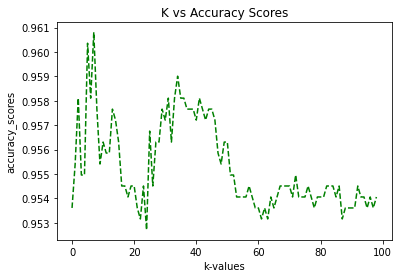

[0.9536036036036036, 0.9554054054054054, 0.9581081081081081, 0.954954954954955, 0.954954954954955, 0.9603603603603603, 0.9581081081081081, 0.9608108108108108, 0.9576576576576576, 0.9554054054054054, 0.9563063063063063, 0.9558558558558559, 0.9558558558558559, 0.9576576576576576, 0.9572072072072072, 0.9563063063063063, 0.9545045045045045, 0.9545045045045045, 0.9540540540540541, 0.9545045045045045, 0.9545045045045045, 0.9536036036036036, 0.9531531531531532, 0.9545045045045045, 0.9527027027027027, 0.9567567567567568, 0.9545045045045045, 0.9563063063063063, 0.9563063063063063, 0.9576576576576576, 0.9572072072072072, 0.9581081081081081, 0.9563063063063063, 0.9581081081081081, 0.959009009009009, 0.9581081081081081, 0.9581081081081081, 0.9576576576576576, 0.9576576576576576, 0.9576576576576576, 0.9572072072072072, 0.9581081081081081, 0.9576576576576576, 0.9572072072072072, 0.9576576576576576, 0.9576576576576576, 0.9572072072072072, 0.9558558558558559, 0.9554054054054054, 0.9563063063063063, 0.

In [100]:
import matplotlib.pyplot as plt
  
# plotting the points 
plt.plot(accuracy_scores, color='green', linestyle='dashed')
  
# naming the x axis
plt.xlabel('k-values')
# naming the y axis
plt.ylabel('accuracy_scores')
  
# giving a title to my graph
plt.title('K vs Accuracy Scores')
  
# function to show the plot
plt.show()
print(accuracy_scores)

##Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

- Max **Accuracy** achieved = 96.08%
- Chosen k-value = 9
- Method used to obtain predicted class is the "classification" function, wherein we employ for-loops to traverse the train set, we check the number of popular neighbours, if it is more than the number of non-popular neighbours, we classify the point as popular.

## Part-2
Vectorize tweets based on the text. More details and reference links can be checked on the Tasks list in the start of the notebook

In [101]:
!pip install PyStemmer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [102]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from Stemmer import Stemmer
import re

# ps = PorterStemmer()
ps = Stemmer('porter')

stop_words = set(stopwords.words("english"))
stop_words.add('rt')

def tokenise(data):
    data = data.lower()
    # removing {|}
    data = re.sub(r"{\|(.*?)\|}", " ", data, flags=re.DOTALL)
    # removing html stuff
    data = re.sub(r"&nbsp;|&lt;|&gt;|&amp;|&quot;|&apos;", r" ", data)
    # substituting hyperlinks with " "
    data = re.sub(r"http\S*[\s | \t | \n]", r" ", data)
    # removing tags and hashtags
    re.sub("(#[A-Za-z0-9]+)|(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", data)
    # tokenization
    tokens = re.split(r'[^A-Za-z0-9]+', data)
    return tokens

def stemming_and_stopping(data):
    StemmedUp = []
    # word of length greater than 35 are considered stopwords and hence, removed
    StemmedUp = [ps.stemWord(i) for i in data if i not in stop_words if len(i) < 35 if len(i) >=2]
    return StemmedUp

def preprocessing(data):
    for idx, x in enumerate(data):
      x = tokenise(x)
      x = stemming_and_stopping(x)
      x = " ".join(x)
      data[idx] = x
    return data

new_df = pd.read_csv('drive/MyDrive/Tweets.csv')
# print(preprocessing(new_df.text.to_list()))
preprocessed = preprocessing(new_df.text.to_list())
print(preprocessed)


      

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['edwardthardi 7th u circuit court appeal upheld lower court rule block indiana mandat forc women undergo', 'venommovi world enough superhero watch new venom trailer 10 18 http co dnh8nqwkfj', 'futbolb teacher v student match on teacher http co np6inxuayx', 'mashabl someon offic actual respond netflix tweet offic http co vj', 'missj0hnson starbuck ask soi milk man behind try make fun think heal', 'baekaeri06 exo magic trick on snap thing flash screen yall wait http', 'realli go miss girl swear god would worst dai ever', '1fubar amandadonnell14 sw18780774 taker human life greatest sin', 'timhiggins2287 year wst show wisi uw system make univers teach research public servic avail', 'thank benjaminstaal00 fantast photo boat http co 1xhduwlxk5', 'calijag made tipton actual hotel disnei world disnei land http co f2ebev22bx', 'anigga gone act right girl realli wanna forc anigga noth', 'choradiyamehul look headlin aajtak mishra alleg kejriw crore corrupt even put question', 'oakvillemayor coun

In [103]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tweet_vectoriser(data):
  """
  Funtion to return a matrix of dimensions (number of tweets, number of features extracted per tweet)
  Following are the steps for be followed:
    1. Remove links, tags and hashtags from each tweet.
    DONE IN THE CELL ABOVE
    2. Apply TF-IDF on the tweets to extract a vector. 
    DOIN NOW
    3. Perform dimensionality reduction on the obtained vector. 
    COOL
  Input parameters to this funcion are to be chosen as per requirement (Example: Array of tweets) 
  """
  # your code here
  vectorizer = TfidfVectorizer(analyzer = 'word')

  # convert the documents into a matrix
  tfidf_wm = vectorizer.fit_transform(data)
  
  tfidf_tokens = vectorizer.get_feature_names()
  size_of_index = len(data)+1
  df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(), index = list(range(1,size_of_index)), columns = tfidf_tokens)
  return df_tfidfvect

# print(tweet_vectoriser(preprocessed))
# print(len(tweet_vectoriser(preprocessed)))
vectorized_tweet_text = tweet_vectoriser(preprocessed)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [104]:
# time for dimensionality reduction
# PCA transforms data linearly into new properties that are not correlated with each other.
'''
  SVD gives you the whole nine-yard of diagonalizing a matrix into special matrices 
  that are easy to manipulate and to analyze. It lay down the foundation to untangle 
  data into independent components. 
  PCA skips less significant components. 
  Obviously, we can use SVD to find PCA by truncating the less important basis 
  vectors in the original SVD matrix.
'''

from sklearn.decomposition import PCA

def get_features(df, df2):
    arr = df.to_numpy()
    ground_truth = df2.to_numpy()
    return arr, ground_truth

tweet_x, tweet_y = get_features(vectorized_tweet_text, df2)
print("before dimensionality reduction ", tweet_x.shape)
pca = PCA(n_components = 20)
pca.fit(tweet_x)
tweet_x = pca.transform(tweet_x)
print("after reduction ", tweet_x.shape)


normalized_tweet_x = normalize(tweet_x)
normalized_tweet_x

x_train, x_test, y_train, y_test = train_test_split(normalized_tweet_x, tweet_y, test_size = 0.2, random_state = 37)


before dimensionality reduction  (11099, 26743)
after reduction  (11099, 20)


Perform KNN using the vector obtained from tweet_vectoriser() function. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

In [105]:
knn = NearestNeighbors(n_neighbors = 3, algorithm = 'auto', metric = 'minkowski', p = 2)
knn.fit(x_train)
val = knn.kneighbors(x_test, return_distance = False)

def text_classification(val, x_train, y_train):
    predicted_test = []
    for i in val:
        counter=0
        for j in i:
            if y_train[j] == 0:
                counter = counter - 1
            else:
                counter = counter + 1
        if(counter<=0):
            predicted_test.append([0])
        else:
            predicted_test.append([1])
    return np.array(predicted_test)
    
l = text_classification(val, x_train, y_train)
print(accuracy_score(y_test, l)*100)




92.83783783783784


[0.9072072072072072, 0.9337837837837838, 0.9283783783783783, 0.936036036036036, 0.9324324324324325, 0.936036036036036, 0.9292792792792792, 0.9315315315315316, 0.9288288288288288, 0.9306306306306307, 0.9265765765765765, 0.927027027027027, 0.9256756756756757, 0.9256756756756757, 0.9247747747747748, 0.9288288288288288, 0.9256756756756757, 0.9261261261261261, 0.9238738738738739, 0.9247747747747748, 0.9243243243243243, 0.9243243243243243, 0.9243243243243243, 0.9256756756756757, 0.9265765765765765, 0.9234234234234234, 0.9234234234234234, 0.9234234234234234, 0.9234234234234234, 0.9234234234234234, 0.922972972972973, 0.922972972972973, 0.922972972972973, 0.922972972972973, 0.922972972972973, 0.922972972972973, 0.922972972972973, 0.922972972972973, 0.922972972972973, 0.9202702702702703, 0.9202702702702703]
0.936036036036036


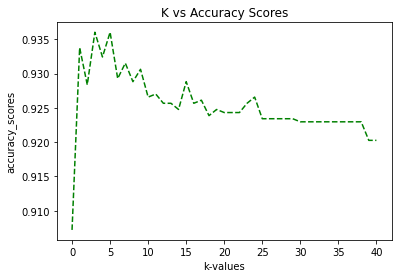

In [106]:
# experimenting for different values of k
text_accuracy_scores = []
for i in range(1, 42):
    knn = NearestNeighbors(n_neighbors = i, algorithm='auto', metric='minkowski', p=2)
    knn.fit(x_train)
    val = knn.kneighbors(x_test, return_distance=False)
    l = text_classification(val, x_train, y_train)
    acc = accuracy_score(y_test, l)
    text_accuracy_scores.append(acc)
text_accuracy_scores
xacc_text = max(text_accuracy_scores)
print(text_accuracy_scores)
print(xacc_text)

# matplotlib karde bhai
import matplotlib.pyplot as plt
  
# plotting the points 
plt.plot(text_accuracy_scores, color='green', linestyle='dashed')
  
# naming the x axis
plt.xlabel('k-values')
# naming the y axis
plt.ylabel('accuracy_scores')
  
# giving a title to my graph
plt.title('K vs Accuracy Scores')
  
# function to show the plot
plt.show()

##Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

- Max **Accuracy** achieved = 93.82%
- Chosen k-value = 4
- Method used to obtain predicted class is the "classification" function, wherein we employ for-loops to traverse the train set, we check the number of popular neighbours, if it is more than the number of non-popular neighbours, we classify the point as popular.
- We reduce the number of dimensions to 20 for the tweet text.

## Part-3
### Subpart-1

Combine both the vectors obtained from the tweet_vectoriser() and get_features()

In [107]:
# your code here
x
len(x)
x.shape

(11099, 11)

In [108]:
tweet_x
len(tweet_x)
tweet_x.shape

(11099, 20)

In [109]:
new_vec = np.concatenate((x, tweet_x), axis = 1)
new_vec.shape

(11099, 31)

Perform KNN using the vector obtained in the previous step. Following are the steps to be followed:

1. Normalise the vectors
2. Split the data into training and test to estimate the performance.
3. Fit the Nearest Neughbiurs module to the training data and obtain the predicted class by getting the nearest neighbours on the test data.
4. Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

In [110]:
normalized_x = normalize(new_vec)
normalized_x
x_train, x_test, y_train, y_test = train_test_split(normalized_x, y, test_size=0.2, random_state=37)

knn = NearestNeighbors(n_neighbors=3, algorithm='auto', metric='minkowski', p=2)
knn.fit(x_train)
val = knn.kneighbors(x_test, return_distance=False)

def concat_classification(val, x_train, y_train):
    predicted_test = []
    for i in val:
        counter=0
        for j in i:
            if y_train[j] == 0:
                counter = counter - 1
            else:
                counter = counter + 1
        if(counter<=0):
            predicted_test.append([0])
        else:
            predicted_test.append([1])
    return np.array(predicted_test)
    
l = concat_classification(val, x_train, y_train)
print(accuracy_score(y_test, l))



0.9536036036036036


0.9581081081081081
[0.9459459459459459, 0.9477477477477477, 0.9536036036036036, 0.9522522522522523, 0.9554054054054054, 0.9558558558558559, 0.9545045045045045, 0.9563063063063063, 0.9558558558558559, 0.9581081081081081, 0.9563063063063063, 0.9545045045045045, 0.9536036036036036, 0.9576576576576576, 0.9572072072072072, 0.954954954954955, 0.9545045045045045, 0.9554054054054054, 0.9527027027027027, 0.9540540540540541, 0.9545045045045045, 0.9558558558558559, 0.954954954954955, 0.9536036036036036, 0.9527027027027027, 0.9545045045045045, 0.9540540540540541, 0.9540540540540541, 0.954954954954955, 0.9545045045045045, 0.954954954954955, 0.9554054054054054, 0.9558558558558559, 0.954954954954955, 0.9545045045045045, 0.9545045045045045, 0.9536036036036036, 0.9536036036036036, 0.9527027027027027, 0.9540540540540541, 0.9540540540540541, 0.9545045045045045, 0.9531531531531532, 0.954954954954955, 0.9536036036036036, 0.9536036036036036, 0.9522522522522523, 0.9531531531531532, 0.9540540540540541]


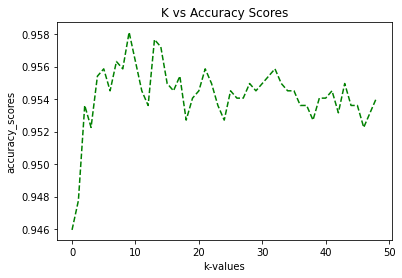

In [111]:
# experimenting for different values of k
concat_accuracy_scores = []
for i in range(1, 50):
    knn = NearestNeighbors(n_neighbors = i, algorithm = 'auto', metric = 'minkowski', p = 2)
    knn.fit(x_train)
    val = knn.kneighbors(x_test, return_distance = False)
    l = concat_classification(val, x_train, y_train)
    acc = accuracy_score(y_test, l)
    concat_accuracy_scores.append(acc)
concat_accuracy_scores
xacc_concat = max(concat_accuracy_scores)
print(xacc_concat)
print(concat_accuracy_scores)

# matplotlib karde bhai
# ok bhai
# plotting the points 
plt.plot(concat_accuracy_scores, color='green', linestyle='dashed')
  
# naming the x axis
plt.xlabel('k-values')
# naming the y axis
plt.ylabel('accuracy_scores')
  
# giving a title to my graph
plt.title('K vs Accuracy Scores')
  
# function to show the plot
plt.show()

### Report the accuracy, chosen k-value and method used to obtain the predicted class. Hint: Plot accuracies for a range of k-values.

- Max achieved at k = 10, Graph is indicative
- Accuracy achieved is 95.81%

### Subpart-2

Explain the differences between the accuracies obtained in each part above based on the features used.

- For the metadata, we achieve a max accuracy of 96.08%.
- For text, we achieve a max accuracy of 93.82%.
- When the features are combined, we achieve an accuracy of 95.81%.
- From these observations, a number of conclusions can be drawn:
  - text is not as feature rich as the metadata. This could either be because of the innate nature of the text, or the the way the text has been tokenised.
  - metadata gives highest accuracy. when combined with text, the accuracy slightly decreases. this implies metadata in itself is of more significance in classifying tweets as popular or not, than the content of the tweets themselves. 